In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.head()

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [5]:
df.drop_duplicates()

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [6]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [7]:
iqr = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold = df.Chirps_Second.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.Chirps_Second.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold, lower_threshold

(19.699999999999996, 12.9)

In [8]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

<AxesSubplot:xlabel='Chirps_Second', ylabel='Ground_Temperature'>

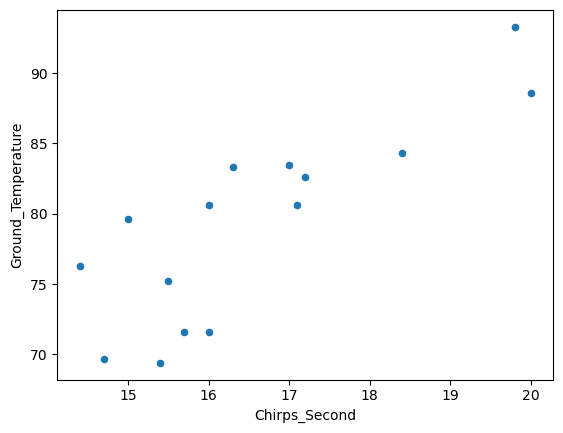

In [9]:
df.plot.scatter(x = 'Chirps_Second', y = 'Ground_Temperature')

In [10]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


1. Find the linear regression equation for this data.

In [11]:
# y = m.x + c

In [12]:
from sklearn. model_selection import train_test_split
X = df.loc[:,['Chirps_Second']]
y = df.loc[:,'Ground_Temperature']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [13]:
X_train

,Chirps_Second
13,17.0
4,17.1
5,15.5
6,14.7
0,20.0
10,15.0
9,16.3
2,19.8
7,15.7
8,15.4


In [14]:
X_test

,Chirps_Second
12,16.0
11,17.2
14,14.4
1,16.0


In [15]:
y_train

13    83.5
4     80.6
5     75.2
6     69.7
0     88.6
10    79.6
9     83.3
2     93.3
7     71.6
8     69.4
3     84.3
Name: Ground_Temperature, dtype: float64

In [16]:
y_test

12    80.6
11    82.6
14    76.3
1     71.6
Name: Ground_Temperature, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
c = reg.intercept_
c

18.762217621468636

In [19]:
m = reg.coef_
m

array([3.6382672])

In [20]:
reg.predict([[18]])

C:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.25102731])

In [21]:
y_predict = reg.predict(X_test)
y_predict

array([76.9744929 , 81.34041354, 71.15326537, 76.9744929 ])

In [22]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predict' : y_predict})
df1

,Actual,Predict
12,80.6,76.974493
11,82.6,81.340414
14,76.3,71.153265
1,71.6,76.974493


Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation

In [23]:
from sklearn import metrics
reg.score(X_test, y_test)

0.020436496362341017

Score is below 0.8, So this is not fit

2. Chart the original data and the equation on the chart.

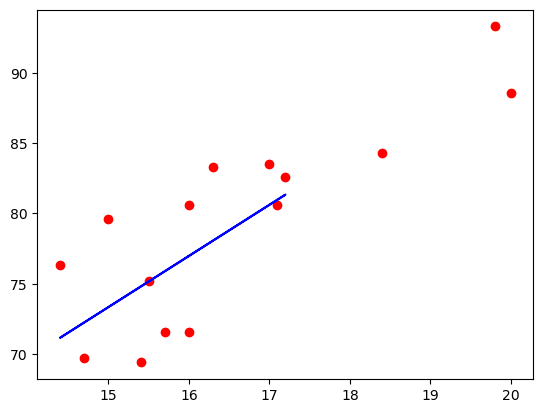

In [24]:
plt.scatter(X,y, color = 'red')
plt.plot(X_test, y_predict, color = 'blue')
plt.show()

4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [25]:
# x = (y - c)/m
x = (95 - c)/m
x

array([20.95442091])

5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [26]:
reg.predict([[18]])

C:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.25102731])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [27]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [28]:
df.shape

(62, 2)

In [29]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [30]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


<AxesSubplot:>

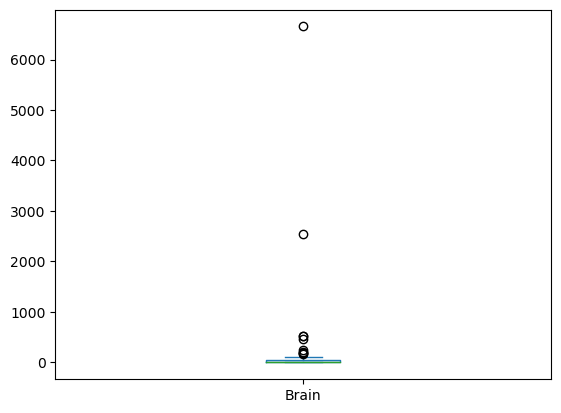

In [31]:
df['Brain'].plot.box()

In [32]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [33]:
q1 = df.Brain.quantile(0.25)
q3 = df.Brain.quantile(0.75)
iqr = q3 - q1
iqr

47.6025

In [34]:
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-70.80375000000001, 119.60625)

In [35]:
df.Brain = df.Brain.clip(lower, upper)

In [36]:
q1 = df.Body.quantile(0.25)
q3 = df.Body.quantile(0.75)
iqr = q3 - q1
iqr

161.75

In [37]:
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-238.375, 408.625)

In [38]:
df.Brain = df.Body.clip(-238.375, 408.625)

In [39]:
df

,Brain,Body
0,44.500,44.5
1,15.500,15.5
2,8.100,8.1
3,408.625,423.0
4,119.500,119.5
...,...,...
57,169.000,169.0
58,2.600,2.6
59,11.400,11.4
60,2.500,2.5


<AxesSubplot:xlabel='Brain', ylabel='Body'>

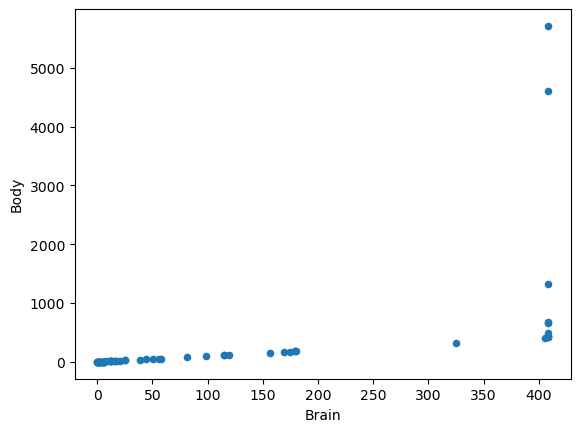

In [40]:
df.plot.scatter(x = 'Brain', y = 'Body')

In [41]:
df.corr()

,Brain,Body
Brain,1.000000,0.558489
Body,0.558489,1.000000


1. Find the linear regression equation for this data for brain weight to body weight.

In [42]:
# y = m.x + c

In [43]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['Brain']]
y = df.loc[:, 'Body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
c = reg.intercept_
c

-134.6101779460585

In [46]:
m = reg.coef_
m

array([4.35818341])

In [47]:
reg.predict([[1.62000]])

C:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-127.54992083])

In [48]:
y_predict = reg.predict(X_test)

In [49]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
41,490.0,1646.252516
58,2.6,-123.278901
1,15.5,-67.058335
3,423.0,1646.252516
29,325.0,1281.799429
31,1320.0,1646.252516
52,1.2,-129.380358
61,50.4,85.042266
9,6.4,-106.717804
59,11.4,-84.926887


2. Chart the original data and the equation on the chart.

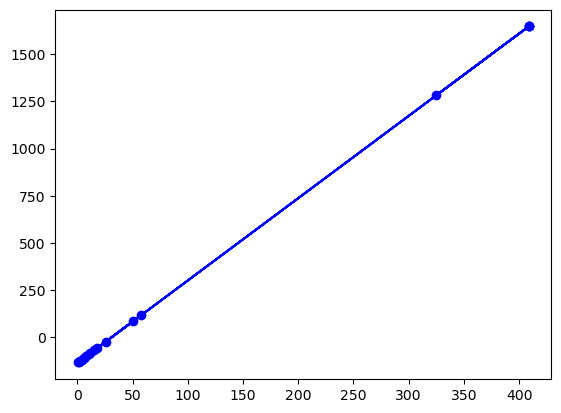

In [50]:
plt.scatter(X_test, y_predict, color = 'blue')
plt.plot(X_test, y_predict, color = 'blue')
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [51]:
from sklearn import metrics
reg.score(X_test, y_test)

-1.1477151367424865

Score is below 0.8, So this is not fit

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [52]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [53]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [54]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [55]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [56]:
df.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [57]:
df.shape

(52, 6)

In [58]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [59]:
upper = q3 + (iqr*1.5) 
lower = q1 - (iqr*1.5) 
lower, upper

(-238.375, 408.625)

In [60]:
q3 = df.Rank.quantile(0.75)
q1 = df.Rank.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5) 
lower = q1 - (iqr*1.5) 
lower, upper

(-2.0, 6.0)

In [61]:
q3 = df.Year.quantile(0.75)
q1 = df.Year.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5) 
lower = q1 - (iqr*1.5) 
lower, upper

(-9.0, 23.0)

In [62]:
q3 = df.Degree.quantile(0.75)
q1 = df.Degree.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5) 
lower = q1 - (iqr*1.5) 
lower, upper

(-1.5, 2.5)

In [63]:
q3 = df.YSdeg.quantile(0.75)
q1 = df.YSdeg.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5) 
lower = q1 - (iqr*1.5) 
lower, upper

(-18.0, 48.0)

In [64]:
df.YSdeg = df.YSdeg.clip(-18.0, 48.0)

<AxesSubplot:xlabel='Sex', ylabel='Salary'>

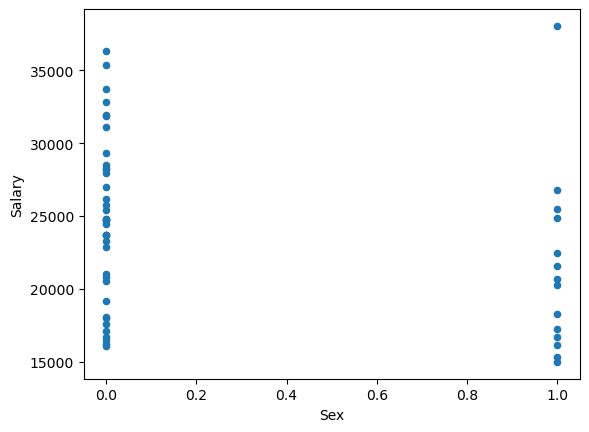

In [65]:
df.plot.scatter(x = 'Sex', y = 'Salary')

<AxesSubplot:xlabel='Sex'>

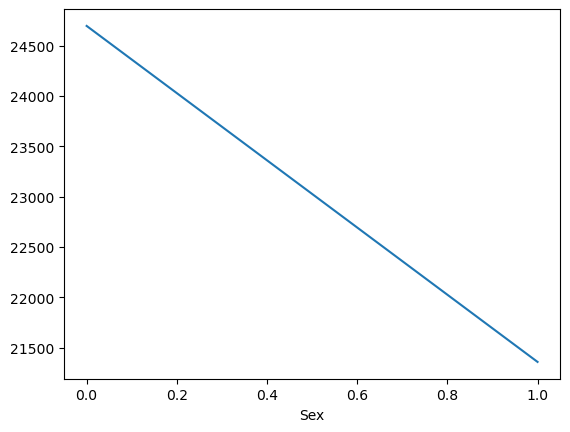

In [66]:
df.groupby('Sex')['Salary'].mean().plot()

In [67]:
df[['Sex', 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


<AxesSubplot:xlabel='Rank', ylabel='Salary'>

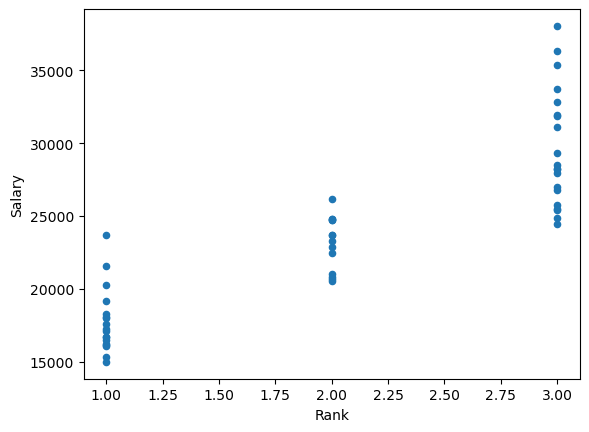

In [68]:
df.plot.scatter(x = 'Rank', y = 'Salary')

<AxesSubplot:xlabel='Rank'>

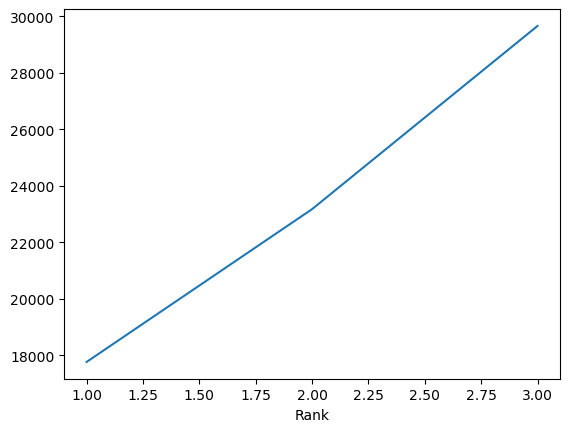

In [69]:
df.groupby('Rank')['Salary'].mean().plot()

In [70]:
df[['Rank', 'Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


<AxesSubplot:xlabel='Year', ylabel='Salary'>

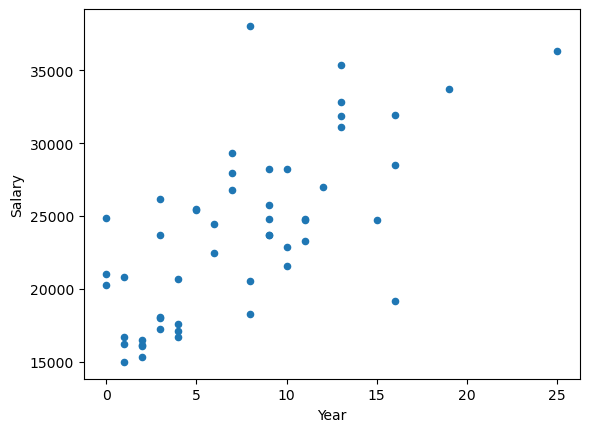

In [71]:
df.plot.scatter(x = 'Year', y = 'Salary')

In [72]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


<AxesSubplot:xlabel='Degree', ylabel='Salary'>

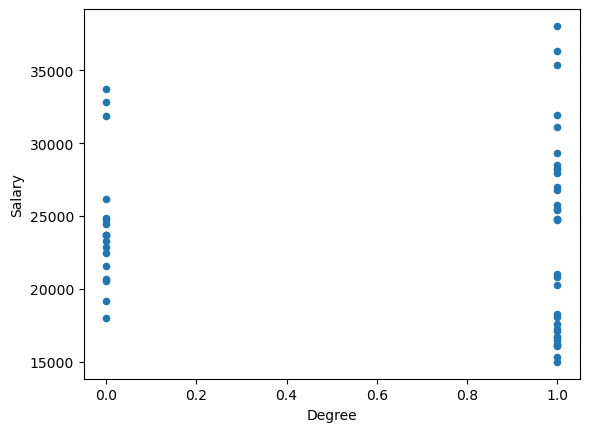

In [73]:
df.plot.scatter(x = 'Degree', y = 'Salary')

<AxesSubplot:xlabel='Degree'>

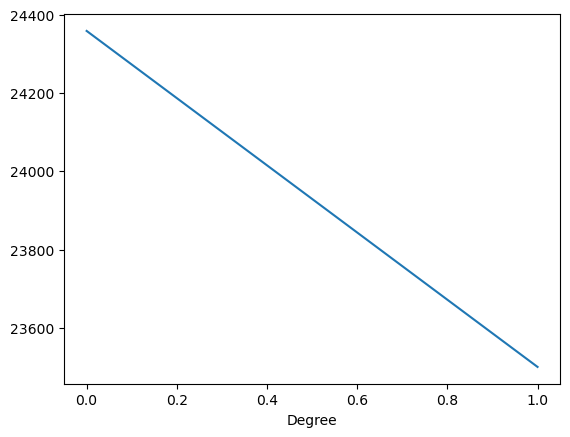

In [74]:
df.groupby('Degree')['Salary'].mean().plot()

In [75]:
df[['Degree', 'Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [76]:
df['transformed'] = np.exp(df['Degree'])

In [77]:
df[['transformed', 'Salary']].corr()

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [78]:
df['transformed_1'] = np.log(df['Degree'])


C:\Python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
df[['transformed_1', 'Salary']].corr()

,transformed_1,Salary
transformed_1,NaN,NaN
Salary,NaN,1.0


1) There is no linear relationship between Degree and Salart 2) Have tried all trasnformations - still not able to see a good linear relationship 3) Have decided to drop the feature

<AxesSubplot:xlabel='YSdeg', ylabel='Salary'>

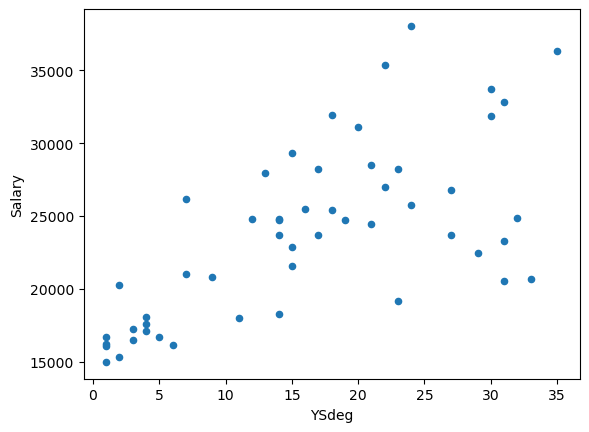

In [80]:
df.plot.scatter(x = 'YSdeg', y = 'Salary')

In [81]:
df[['YSdeg', 'Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [82]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary,transformed,transformed_1
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782,0.077112,NaN
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488,-0.014564,NaN
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669,-0.143377,NaN
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726,1.000000,NaN
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854,-0.482836,NaN
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000,-0.069726,NaN
transformed,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726,1.000000,NaN
transformed_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary', 'transformed',
       'transformed_1'],
      dtype='object')

1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [84]:
# y = m1x1 + m2x2 + m3x3 + m4x4 + c

In [85]:
from sklearn.model_selection import train_test_split

X = df[['Sex', 'Rank', 'Year','YSdeg']].values
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
coef_df = pd.DataFrame(reg.coef_,['Sex', 'Rank', 'Year','YSdeg'], columns=['Coefficient'])
y_predict = reg.predict(X_test_scaled)

In [89]:
coef_df

,Coefficient
Sex,587.072759
Rank,4457.994612
Year,2101.374410
YSdeg,-605.595595


In [90]:
reg.intercept_

23018.916666666668

In [91]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
0,20525,22762.280990
1,17095,17426.923989
2,31114,30824.410103
3,29342,28603.698377
4,24742,25056.020795
5,28516,32025.795500
6,23712,23425.716998
7,27025,30282.346806
8,35350,30703.037391
9,24832,24336.012338


2. Find the selection of columns with the best $R^2$ score.

In [92]:
from sklearn import metrics
reg.score(X_test_scaled, y_test)

0.869741519948811

3. Report whether sex is a factor in salary.

In [93]:
coef_df

,Coefficient
Sex,587.072759
Rank,4457.994612
Year,2101.374410
YSdeg,-605.595595


Sex have least factor in salary